# Neural & Behavioral Modeling - Week 9 (Exercises)
by 李采蓉 b08207042@ntu.edu.tw

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 A Two-layered Linear Network as a Regression Model (8 points)
Data fitting of the following network is poor. Please check if adding bias terms or chaging network hyperparameters (e.g., learning rate, amount of training, etc.) help. If not, please explain why the fitting is poor given that the network/regression model has sufficient degrees of freedom (i.e., network weights or regression coefficients) to overfit such a small data set.

Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.679  0.   ]
 [ 0.643 -0.   ]
 [ 1.321  0.   ]
 [-0.     0.643]
 [ 0.     0.643]
 [ 0.     1.286]]


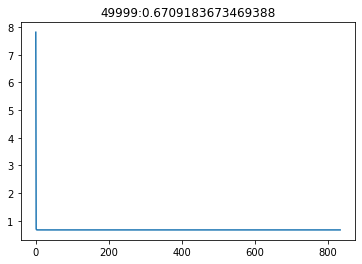

In [2]:
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix

eta=.1; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W.dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)
    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

### adding bias terms and changing network hyperparameters(learning rate=0.001, maximum iterations=256)

Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[ 0.491  0.313]
 [ 0.266  0.286]
 [ 0.757  0.599]
 [-0.011  0.578]
 [ 0.076  0.653]
 [ 0.065  1.231]]


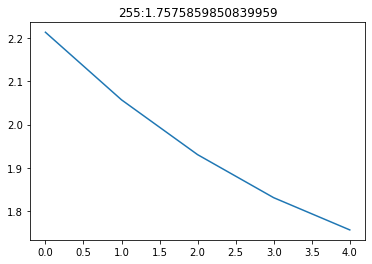

In [4]:
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions
W=random.rand(Ny,Nx); # set initially random connectivity matrix

eta=.001; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=256; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose a traing pattern at random
    
    # Forward propagation:
    y=W.dot(X[p])+1 # adding the bias term
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        predY=W[:,:4].dot(X.T) # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)
    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

**思路：**<br>
直接講結果的話，就是沒有變更好：）<br>
加入bias terms的意義在於使$W$不用跑到更大的值便能使accuracy增大，能夠靈活的區隔。當然$W$的起始值還是有一定的作用存在，使得輸出的結果會有不同程度上的變動。<br>
基本上我也不知道為什麼加上bias term之後效果那麼差，目前想到的是現在所設的bias term為1，這跟0到1的距離一樣，所以加上它很容易讓每一輪結果小小的爆掉，為了調整這個小小的爆掉，勢必得調整learning rate讓它每一步走得更小一點，最後做出來的結果就是這樣了。


參考資料：<br>
[What is the role of the bias in neural networks?](https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks)<br>
[神经网络中，bias有什么用，为什么要设置bias，当加权和大于某值时，激活才有意义？](https://www.zhihu.com/question/68247574)

這次作業有讓我回想起調參數的痛苦了(抖

### adding bias terms and hidden layer, and also changing hyperparameters(learning rate=0.01)

Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[0.911 0.084]
 [0.916 0.089]
 [0.994 0.012]
 [0.084 0.911]
 [0.088 0.914]
 [0.012 0.994]]


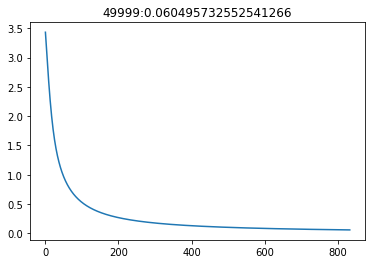

In [3]:
set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions

nHid=1; # set the number of hidden units
U=random.rand(nHid,Nx+1) # set initial input-hidden connectivity matrix

eta=.01; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    # p=random.randint(nP); # choose a traing pattern at random
    
    # Forward propagation:
    '''
    X=append(X[p],1) # adding the bias term
    y=W.dot(X[p])
    '''
    x=append(X[p],1) # adding the bias term
    y=1/(1+exp(-dot(U,x))) # compute the hidden unit response
    e=Y[p]-y # error e for the chosen input    
    
    # Backward propagation:
    '''
    deltaW=eta*outer(Y[p].T-y,X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    '''
    yg=e*(y*(1-y)) # compute the output error signal
    deltaU=eta*outer(yg,x) # compute change in input-hidden weights
    U=U+deltaU; # update the input-hidden weights  
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        x=hstack([X,ones([Np,1])]) # append bias to all input patterns
        y=1/(1+exp(-dot(x,U.T))) # compute the hidden unit response
        predY=y.T # testing ALL the training samples
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)
    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y